In [1]:
# Validate Crime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
validate_crime = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/crime2.csv",  header=None)

In [3]:
validate_crime.columns = ["city", "population","Violent crime","Murder","Rape (revised)","Rape (legacy)"
                 ,"Robbery","Aggravated assault","Property crime","Burglary","Larceny-theft","Motor vehicle theft","Arson3"]


In [4]:
validate_crime.head()

,city,population,Violent crime,Murder,Rape (revised),Rape (legacy),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
0,Adams Village,"1,851",0,0.0,NaN,0.0,0,0,11,1,10,0,0.0
1,Addison Town and Village,"2,568",2,0.0,NaN,0.0,1,1,49,1,47,1,0.0
2,Afton Village4,820,0,0.0,0,NaN,0,0,1,0,1,0,0.0
3,Akron Village,"2,842",1,0.0,NaN,0.0,0,1,17,0,17,0,0.0
4,Albany4,"98,595",802,8.0,54,NaN,237,503,"3,888",683,"3,083",122,12.0


In [5]:
validate_crime.dtypes

city                    object
population              object
Violent crime           object
Murder                 float64
Rape (revised)          object
Rape (legacy)          float64
Robbery                 object
Aggravated assault      object
Property crime          object
Burglary                object
Larceny-theft           object
Motor vehicle theft     object
Arson3                 float64
dtype: object

In [6]:
# I tried to make these into numerics but the commas are causing a problem, so I removing them.
#validate_crime['Murder'] = validate_crime['Murder'].str.replace(',', '')
validate_crime['Robbery'] = validate_crime['Robbery'].str.replace(',', '')
validate_crime['population'] = validate_crime['population'].str.replace(',', '')
validate_crime['Violent crime'] = validate_crime['Violent crime'].str.replace(',', '')
validate_crime['Rape (revised)'] = validate_crime['Rape (revised)'].str.replace(',', '')
validate_crime['Aggravated assault'] = validate_crime['Aggravated assault'].str.replace(',', '')
validate_crime['Property crime'] = validate_crime['Property crime'].str.replace(',', '')
validate_crime['Burglary'] = validate_crime['Burglary'].str.replace(',', '')
validate_crime['Larceny-theft'] = validate_crime['Larceny-theft'].str.replace(',', '')
validate_crime['Motor vehicle theft'] = validate_crime['Motor vehicle theft'].str.replace(',', '')
#validate_crime['Arson3'] = validate_crime['Arson3'].str.replace(',', '')

In [7]:
for column in ['Murder','Robbery','population','Violent crime','Rape (revised)','Aggravated assault','Property crime','Burglary','Larceny-theft','Motor vehicle theft']:
    validate_crime[column].fillna(validate_crime[column].mode()[0], inplace=True)

In [8]:
validate_crime.dtypes

city                    object
population              object
Violent crime           object
Murder                 float64
Rape (revised)          object
Rape (legacy)          float64
Robbery                 object
Aggravated assault      object
Property crime          object
Burglary                object
Larceny-theft           object
Motor vehicle theft     object
Arson3                 float64
dtype: object

In [9]:
validate_crime[['Murder','Robbery','population','Violent crime','Rape (revised)','Aggravated assault','Property crime','Burglary','Larceny-theft','Motor vehicle theft']] = validate_crime[['Murder','Robbery','population','Violent crime','Rape (revised)','Aggravated assault','Property crime','Burglary','Larceny-theft','Motor vehicle theft']].apply(pd.to_numeric)

In [10]:
validate_crime.dtypes

city                    object
population               int64
Violent crime            int64
Murder                 float64
Rape (revised)           int64
Rape (legacy)          float64
Robbery                  int64
Aggravated assault       int64
Property crime           int64
Burglary                 int64
Larceny-theft            int64
Motor vehicle theft      int64
Arson3                 float64
dtype: object

In [11]:
#create the population squared column
validate_crime['popsqrd'] = validate_crime['population'] *  validate_crime['population']

In [12]:
#Translate the two continuous variables into categorical
validate_crime['Murder_bool'] = np.where((validate_crime['Murder'] > 0),1,0)
validate_crime['Robbery_bool'] = np.where((validate_crime['Robbery'] > 0),1,0)

In [13]:
# Only works on cities < 30K
validate_crime_filter = validate_crime.query('population<30000')

In [14]:
crime = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")
crime.columns = ["city", "population","Violent crime","Murder","Rape (revised)","Rape (legacy)"
                 ,"Robbery","Aggravated assault","Property crime","Burglary","Larceny-theft","Motor vehicle theft","Arson3"]
crime = crime.drop([0,1,2,3,352,353,354])
crime['Murder'] = crime['Murder'].str.replace(',', '')
crime['Robbery'] = crime['Robbery'].str.replace(',', '')
crime['population'] = crime['population'].str.replace(',', '')
crime['Violent crime'] = crime['Violent crime'].str.replace(',', '')
crime['Rape (revised)'] = crime['Rape (revised)'].str.replace(',', '')
crime['Aggravated assault'] = crime['Aggravated assault'].str.replace(',', '')
crime['Property crime'] = crime['Property crime'].str.replace(',', '')
crime['Burglary'] = crime['Burglary'].str.replace(',', '')
crime['Larceny-theft'] = crime['Larceny-theft'].str.replace(',', '')
crime['Motor vehicle theft'] = crime['Motor vehicle theft'].str.replace(',', '')
crime['Arson3'] = crime['Arson3'].str.replace(',', '')
crime[['Murder','Robbery','population','Violent crime','Rape (revised)','Aggravated assault','Property crime','Burglary','Larceny-theft','Motor vehicle theft','Arson3']] = crime[['Murder','Robbery','population','Violent crime','Rape (revised)','Aggravated assault','Property crime','Burglary','Larceny-theft','Motor vehicle theft','Arson3']].apply(pd.to_numeric)
crime['popsqrd'] = crime['population'] *  crime['population']
crime_filter = crime.query('population<30000')
crime_filter['Murder_bool'] = np.where((crime_filter['Murder'] > 0),1,0)
crime_filter['Robbery_bool'] = np.where((crime_filter['Robbery'] > 0),1,0)

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

test = validate_crime_filter
train = crime_filter
#X = train[['population','Murder','Robbery']]   ## pretty good (66) 58% on test model, cross- val 34%
#X = train[['popsqrd','Murder','Robbery']] ## pretty good (62)  55 % on test, cross-val only 28%?
#X = train[['popsqrd','Murder_bool','Robbery_bool']] ## 61% original, 60% on new, 57.5% cross-validation

#X2 = test[['population','Murder','Robbery']]
#X2 = test[['popsqrd','Murder','Robbery']] 
#X2 = test[['popsqrd','Murder_bool','Robbery_bool']] 


Y = train['Property crime']
Y2 = test['Property crime']

# Fit our model to the data from training set
model = regr.fit(X, Y)

# Test
predictions = regr.predict(X2)


In [56]:
# Inspect the results of original model
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [  5.70199155e-07  -4.77329301e+01   8.16572170e+00]

Intercept: 
 72.4632225503

R-squared:
0.620445805532


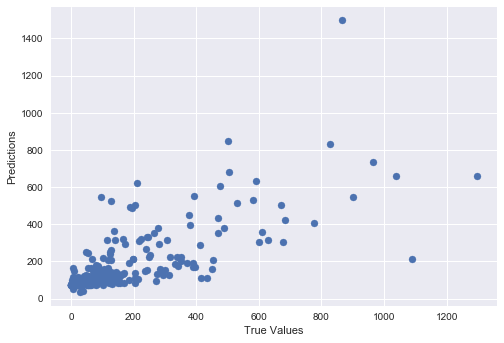

In [57]:
plt.scatter(Y2, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [58]:
print(model.score(X2, Y2))

0.554709435115


# K-Folds Validation

In [59]:
# Perform 5-fold cross validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model, X2, Y2, cv=5)
print(scores)


[ 0.60923516  0.55505186  0.49081541 -0.63641782  0.61538207]


In [60]:
# Perform 5-fold cross validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model, X, Y, cv=5)
print(scores)


[ 0.72478696  0.54891454  0.55964477 -1.68244865  0.68976823]


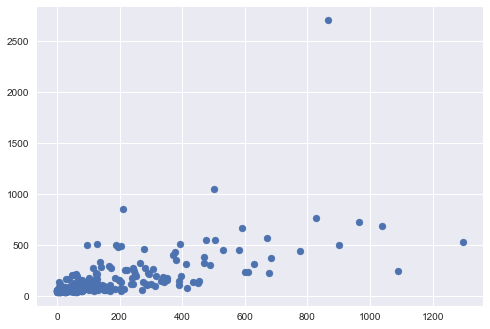

In [61]:
# Make cross validated predictions
predictions = cross_val_predict(model, X2, Y2, cv=5)
plt.scatter(Y2, predictions)
plt.show()

In [62]:
accuracy = metrics.r2_score(Y2, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.282340143617


In [ ]:
# my model sucks